In [1]:
import tensorflow as tf
from tensorflow.keras import model,layers
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
!pip install tensorflow


In [7]:
!pip install keras

In [8]:
import tensorflow as tf
from tensorflow.keras import model,layers
import matplotlib.pyplot as plt

C:\Users\Hem\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ImportError: cannot import name 'model' from 'tensorflow.keras' (C:\Users\Hem\anaconda3\lib\site-packages\keras\api\_v2\keras\__init__.py)

In [12]:
Image_Size=256
Batch_Size=32
Channels=3
epoch=50

In [13]:
 dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "plant village",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_size,
)

Found 2152 files belonging to 3 classes.


In [15]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy.astype("unit8"))


NameError: name 'plt' is not defined

In [22]:
!pip install matplotlib
!pip install numpy

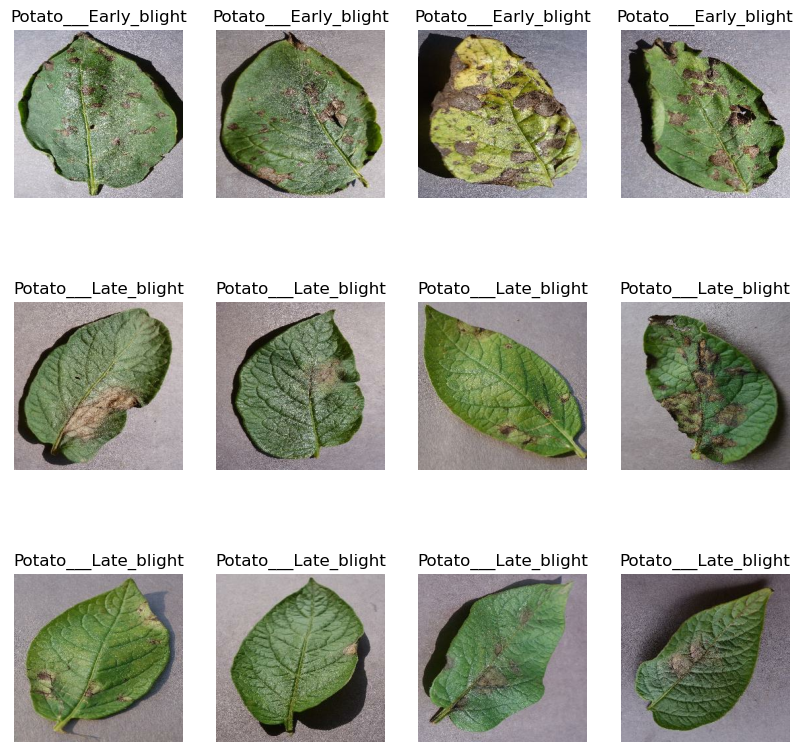

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [27]:
train_size=0.8
len(dataset)*0.8

54.400000000000006

In [29]:
train_ds=dataset.take(54)
len(train_ds)

54

In [30]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [31]:
val_size=0.1
len(dataset)*0.1

6.800000000000001

In [32]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [33]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [37]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [43]:
from tensorflow.keras import layers
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [44]:
 data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [48]:
from tensorflow.keras import models
input_shape = (Batch_Size, Image_Size, Image_Size, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [52]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


C:\Users\Hem\anaconda3\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 71s 1s/step - loss: 0.9190 - accuracy: 0.4867 - val_loss: 0.8323 - val_accuracy: 0.6250
Epoch 2/50
54/54 [==============================] - 63s 1s/step - loss: 0.6720 - accuracy: 0.6875 - val_loss: 0.4664 - val_accuracy: 0.8125
Epoch 3/50
54/54 [==============================] - 62s 1s/step - loss: 0.5068 - accuracy: 0.7818 - val_loss: 0.3406 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 60s 1s/step - loss: 0.3823 - accuracy: 0.8478 - val_loss: 0.3671 - val_accuracy: 0.8073
Epoch 5/50
54/54 [==============================] - 61s 1s/step - loss: 0.3356 - accuracy: 0.8686 - val_loss: 0.2589 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 59s 1s/step - loss: 0.2333 - accuracy: 0.9045 - val_loss: 0.1239 - val_accuracy: 0.9531
Epoch 7/50
54/54 [==============================] - 60s 1s/step - loss: 0.1884 - accuracy: 0.9236 - val_loss: 0.1954 - val_accuracy: 0.9375
Epoch 8/50
54/54 [=============

In [53]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 195ms/step - loss: 0.1063 - accuracy: 0.9828


In [54]:
scores

[0.10633144527673721, 0.982758641242981]

In [55]:
history

In [56]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

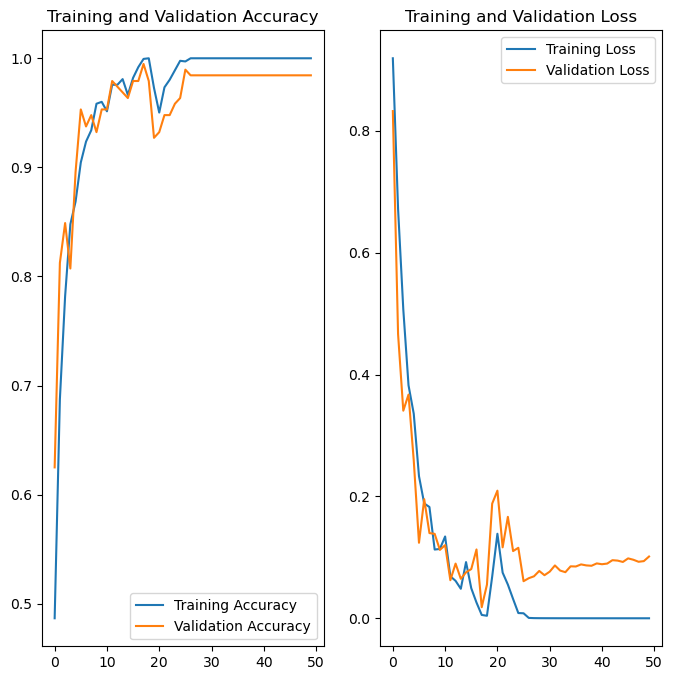

In [60]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 406ms/step
predicted label: Potato___Early_blight


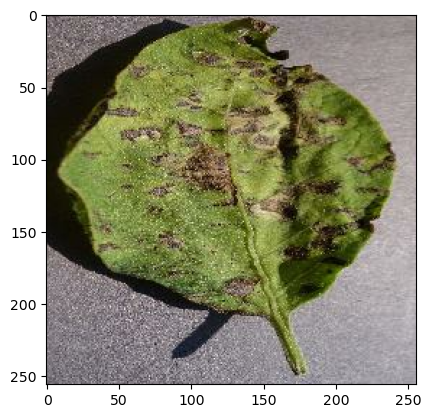

In [61]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [62]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


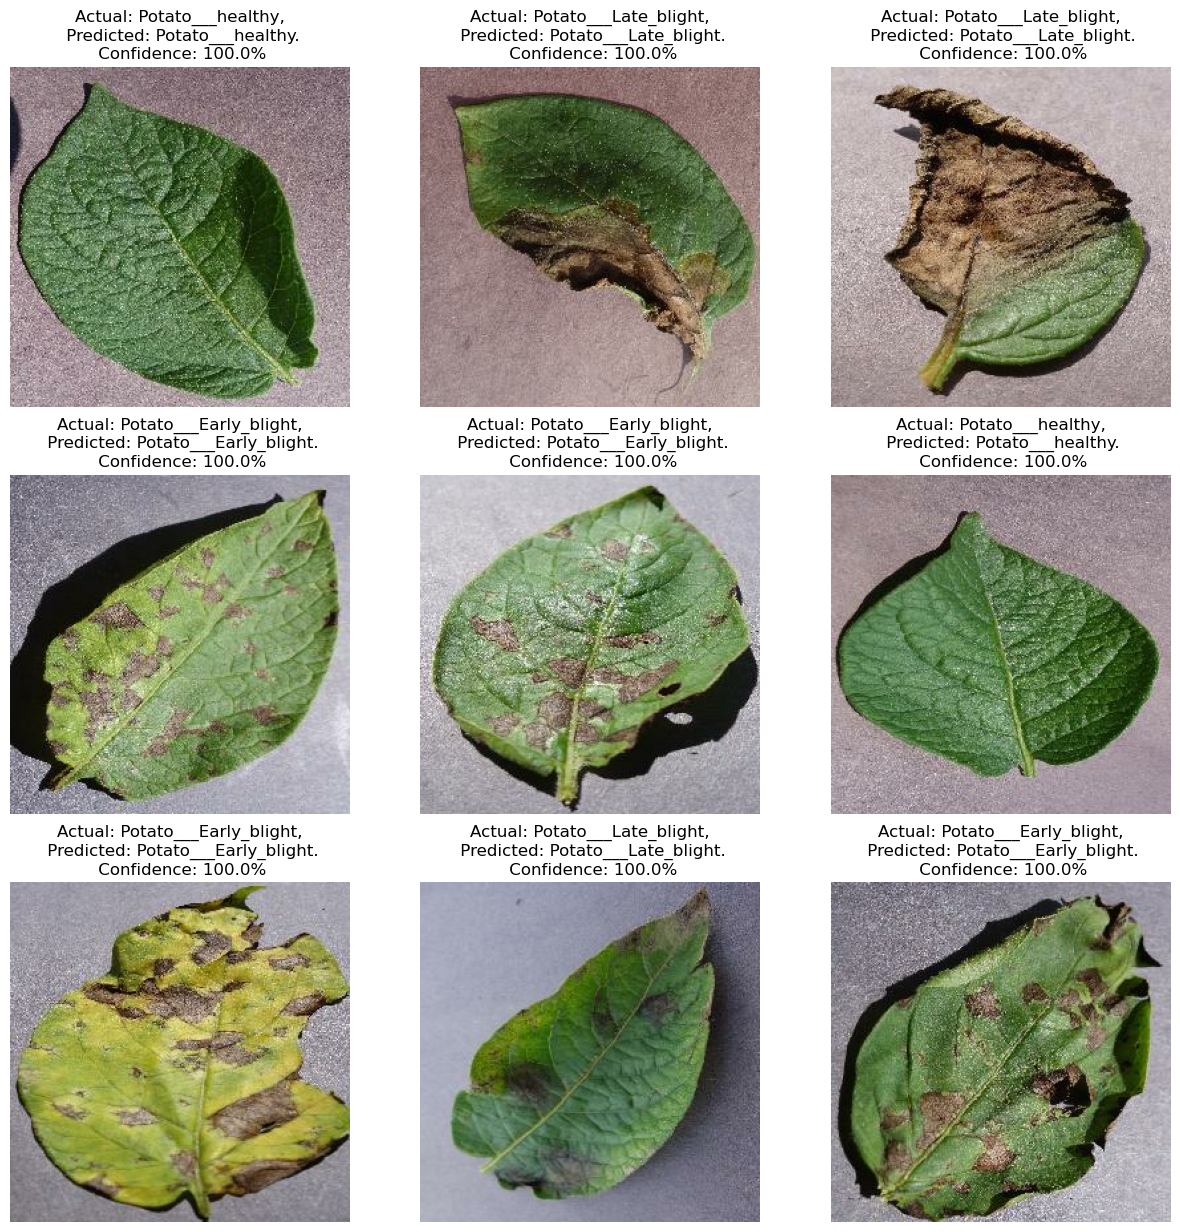

In [63]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [66]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
